# Fundamentals of Machine Learning - Exercise 2
* The aim of the exercise is to learn basic techniques for visualization creation and interpretation using Matplotlib and Seaborn libraries.

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_02.png?raw=true)

# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [17]:
df = pd.read_csv("datasets/zsu_cv1_data.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Price is the most interisting attribute in our dataset, let's take a look on its distribution
- SalePrice

## Vizualize house prices in form of histogram
- What does it tell us about the prices?

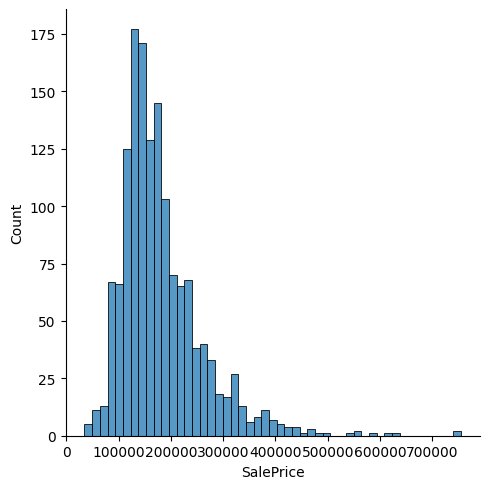

In [5]:
sns.displot(df.SalePrice)

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

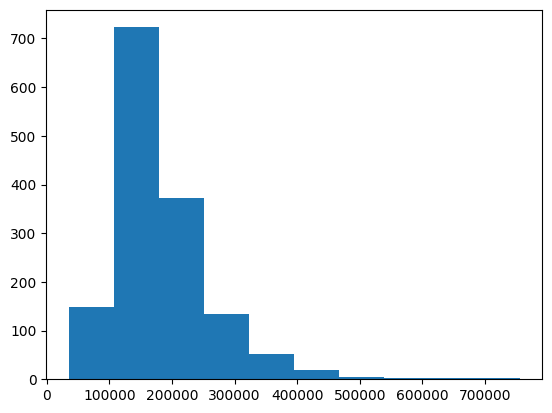

In [4]:
plt.hist(df.SalePrice)

### Modify bins
- Perhaps we want to visualize the histogram with more dense or coarse bins
- *bins* attribute

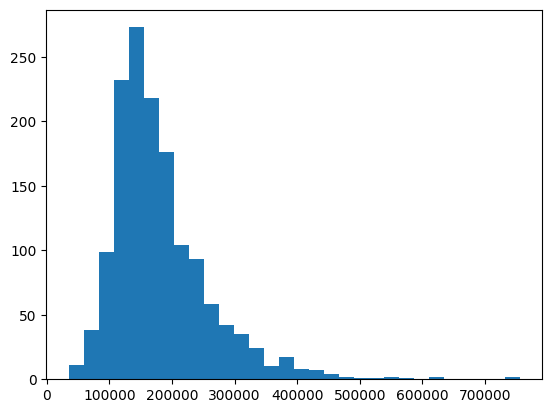

In [7]:
plt.hist(df.SalePrice, bins=30)
plt.show()

### Use quartiles (Q1, Q3) for highlighting most common price range in histogram

* Check functions *describe* and *quantile* over price column

In [8]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
df.SalePrice.quantile(.25), df.SalePrice.quantile(.75)

(129975.0, 214000.0)

## 🔎 What can we say about prices based on the quantiles?
### Use function *axvline* from Matplotlib to draw vertical lines at the quartile positions

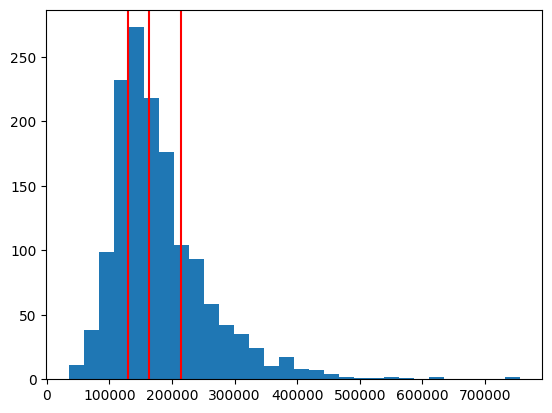

In [22]:
plt.hist(df.SalePrice, bins=30)
plt.axvline(df.SalePrice.quantile(.25), color='red')
# plt.axvline(df.SalePrice.quantile(.50), color='red')
plt.axvline(df.SalePrice.quantile(.75), color='red')
plt.show()

## 📊 Let's add more complexity to histogram vizualizations. 
### Does price change for different values of GaragaFinish attribute?

### GarageFinish: Interior finish of the garage
- Fin	Finished
- RFn	Rough Finished	
- Unf	Unfinished
- NA	No Garage

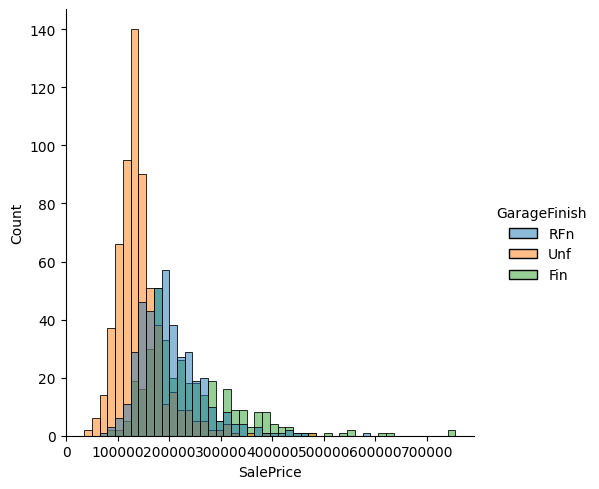

In [29]:
sns.displot(df, x="SalePrice", hue="GarageFinish")

### 💡 We can see that houses with no garage are somehow missing
- The no garage houses have a *nan* value in the feature so they are not plotted

### Fill nan values with 'NoGarage' string

In [25]:
df.GarageFinish.fillna("NoGarage", inplace=True)

In [30]:
df["GarageFinish"] = df.GarageFinish.fillna("NoGarage")

### Take a look at the histogram again

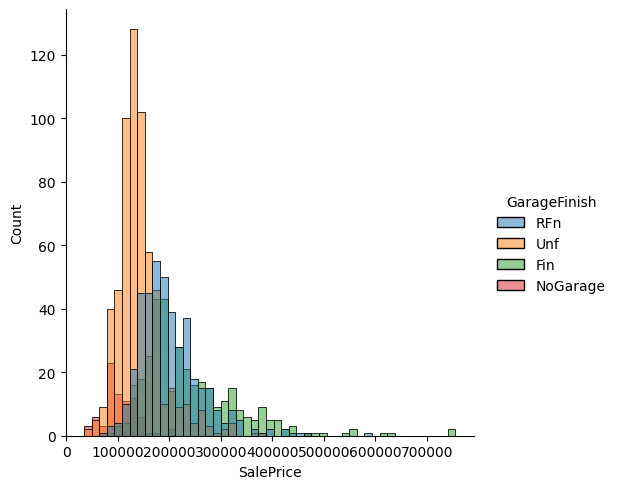

In [31]:
sns.displot(df, x="SalePrice", hue="GarageFinish")

## 💡 Sometimes the histograms distinguished by colors are not easily redeable
- We can use *col* attribute to automatically plot every histogram on its own canvas

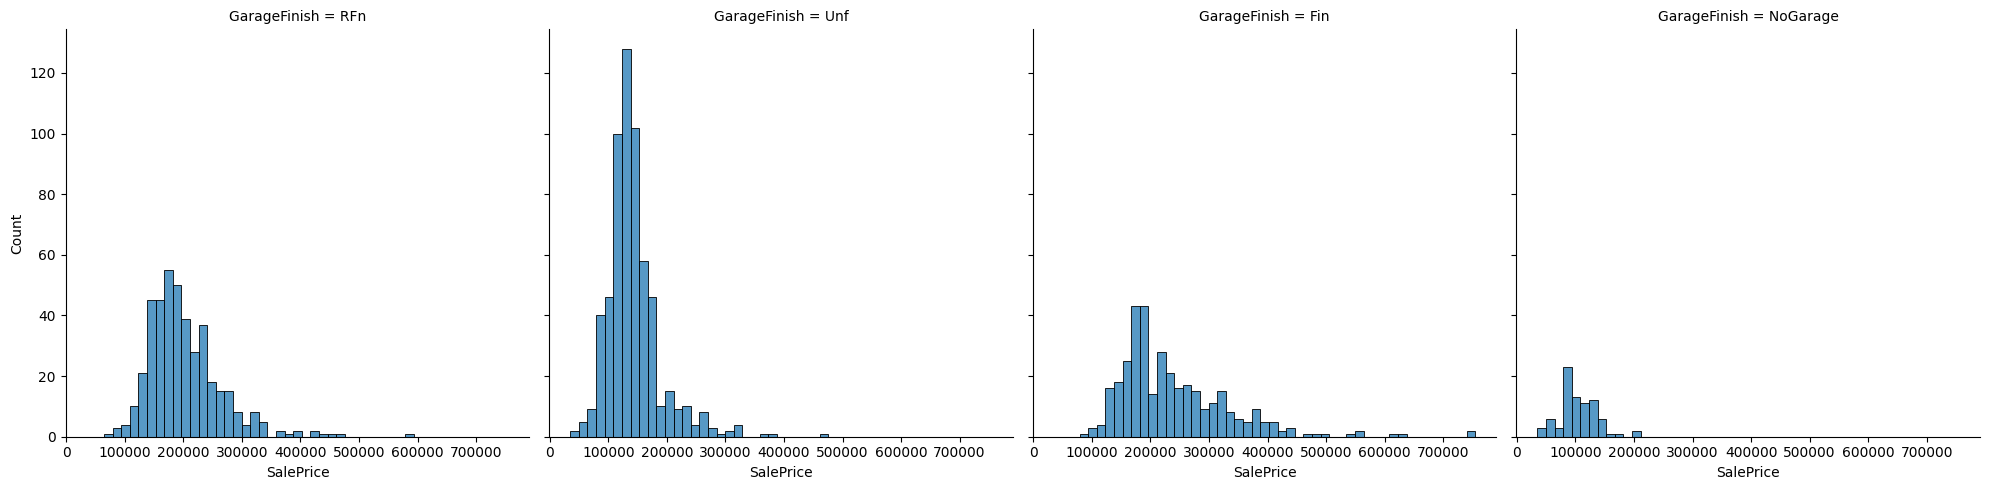

In [32]:
sns.displot(df, x="SalePrice", col="GarageFinish")

# 📊 Another very useful tecnique for the numerical features distributions are boxplots
- 🔎 Did you see any of these before?

- 🔎 How should we read boxplots?
    - **Quartiles**
    - **Median**
    - Box size
    - **Outliers and IQR**
    - Min/max - with or without outliers

### Plot only the *SalePrice* using boxplot

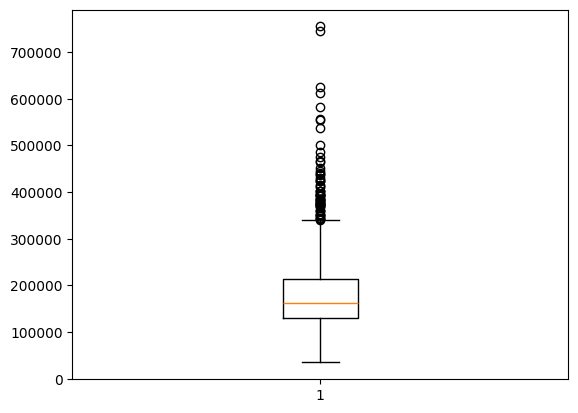

In [37]:
plt.boxplot(df.SalePrice)
plt.show()

## Let's take a look at the *SalePrice* for different *BldgType* values 
- 🔎 What can we say about the prices?

<Axes: xlabel='BldgType', ylabel='SalePrice'>

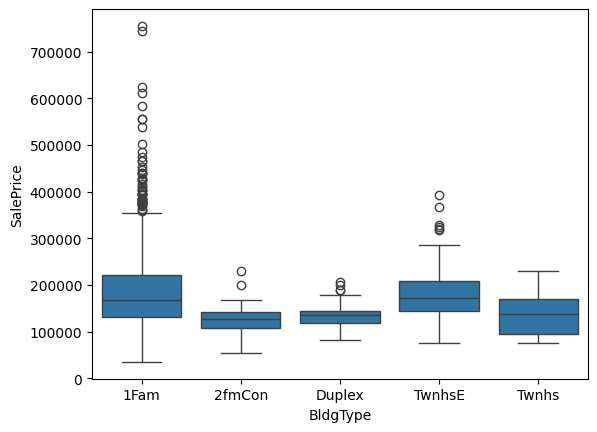

In [35]:
sns.boxplot(data=df, x="BldgType", y="SalePrice")

## We can do the same for *GrLivArea*

<Axes: xlabel='BldgType', ylabel='GrLivArea'>

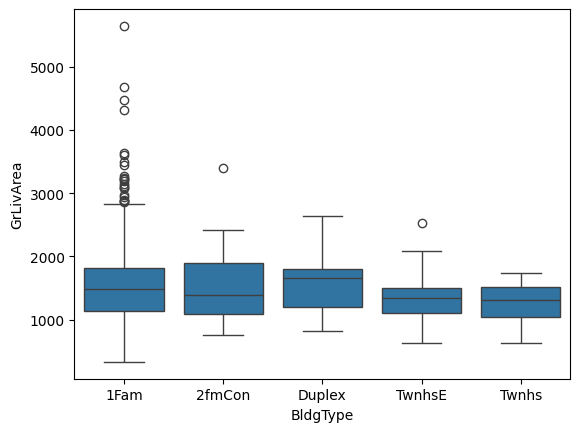

In [38]:
sns.boxplot(data=df, x="BldgType", y="GrLivArea")

## Let's take a look at the *GrLivArea* for different *BldgType* values 
- 🔎 What can we say about the GrLivArea?

<Axes: xlabel='BldgType', ylabel='GrLivArea'>

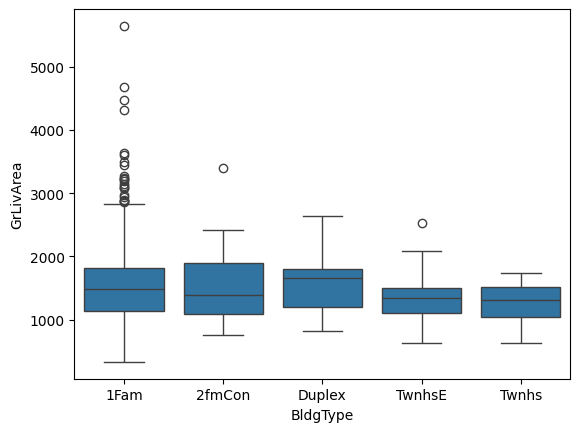

In [40]:
sns.boxplot(data=df, x="BldgType", y="GrLivArea")

# 📊 Scatter plots are commonly used for visualizing two numerical variables

### We can use standard *scatterplot* with *BldgType* as a *hue* so we can better grasp the relationship between *GrLivArea* and *SalePrice*
* Try to set *alpha* parameter for opacity settings

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

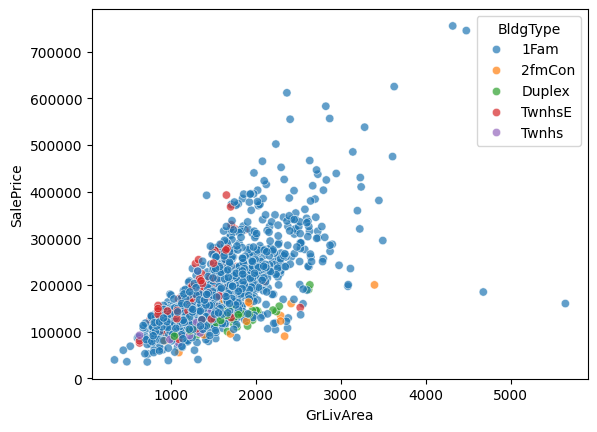

In [45]:
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", hue="BldgType", alpha=.7)

### We can see there are some outliers in the data, let's zoom only to area without them, how can we filter the data?

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

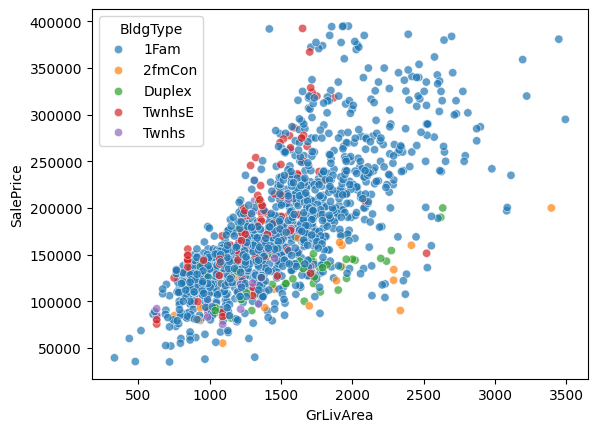

In [48]:
sns.scatterplot(data=df[(df.SalePrice < 400_000) & (df.GrLivArea < 3_500)], x="GrLivArea", y="SalePrice", hue="BldgType", alpha=.7)

# We have an information about a month and a year for the sold houses.
## 🔎 Can you vizualize what was the average price of the house by quarters?

* We need to create a new column **YearQuarterSold** with merged Year and Quarter information in this pattern: '2010-1','2010-2' and so on first
    * We can map the values using the *apply* function or use string concatenation directly
* 💡 If you need to change data type of the columns, you can use *astype*

In [62]:
import math

df["YearQuarterSold"] = df.apply(lambda row: f"{row.YrSold}-{math.ceil(row.MoSold / 3)}", axis=1)

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearQuarterSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2008-1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2007-2
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2008-3
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2008-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,2007-3
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,2010-1
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,2010-2
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,2010-2


### Compute the average price for the *YearQuarterSold* attribute

In [64]:
avg_price = df.groupby("YearQuarterSold").SalePrice.mean()

## Vizualize the data using *lineplot*
- In case of xlabels mixing try to tune the *rotation* and *horizontalalignment* parameters

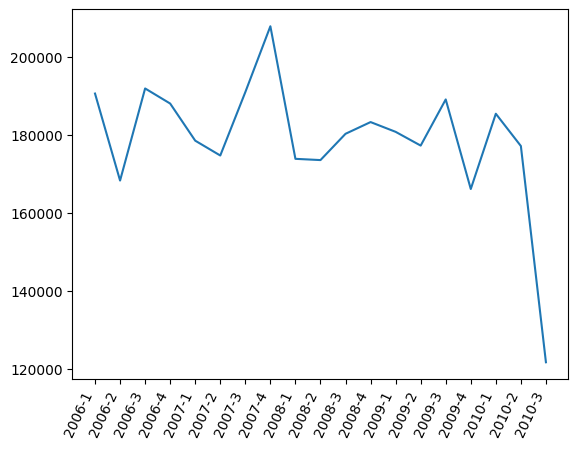

In [68]:
plt.plot(avg_price.index, avg_price.values)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

### Add the max, min and median to the plot
- Use *describe* and the [Pandas Melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function
    - use YearQuarterSold as an *id_vars*
    - use 'min', 'mean', '50%', 'max' as *value_vars*

In [70]:
df.groupby('YearQuarterSold').SalePrice.describe().reset_index()

,YearQuarterSold,count,mean,std,min,25%,50%,75%,max
0,2006-1,44.0,190553.522727,71075.435079,52500.0,142875.0,172700.0,228250.0,423000.0
1,2006-2,113.0,168277.176991,69911.153137,79000.0,124000.0,151400.0,197000.0,475000.0
2,2006-3,105.0,191858.980952,89590.623994,80500.0,133000.0,173900.0,225000.0,625000.0
3,2006-4,52.0,187993.480769,81497.678182,35311.0,135375.0,161500.0,231375.0,438780.0
4,2007-1,44.0,178489.159091,119137.563987,39300.0,122000.0,145450.0,200125.0,755000.0
5,2007-2,125.0,174689.232000,67540.070823,79000.0,129000.0,155000.0,195000.0,430000.0
6,2007-3,102.0,190919.156863,91880.502412,64500.0,134250.0,169750.0,217250.0,745000.0
7,2007-4,58.0,207781.827586,76748.133942,67000.0,144000.0,197450.0,264175.0,392000.0
8,2008-1,41.0,173837.951220,73278.323817,55000.0,127000.0,159895.0,192000.0,412500.0
9,2008-2,115.0,173518.391304,64384.079684,68500.0,132750.0,161000.0,200000.0,385000.0


![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_01.png?raw=true)

In [71]:
df_agg = df.groupby('YearQuarterSold').SalePrice.describe().reset_index()
df_melt = pd.melt(df_agg, id_vars=['YearQuarterSold'], value_vars=['min', 'mean', '50%', 'max'])
df_melt

,YearQuarterSold,variable,value
0,2006-1,min,52500.0
1,2006-2,min,79000.0
2,2006-3,min,80500.0
3,2006-4,min,35311.0
4,2007-1,min,39300.0
...,...,...,...
71,2009-3,max,501837.0
72,2009-4,max,377500.0
73,2010-1,max,611657.0
74,2010-2,max,538000.0


## What can we say about the minimum and maximum values?
- 💡Take a look at std. deviation

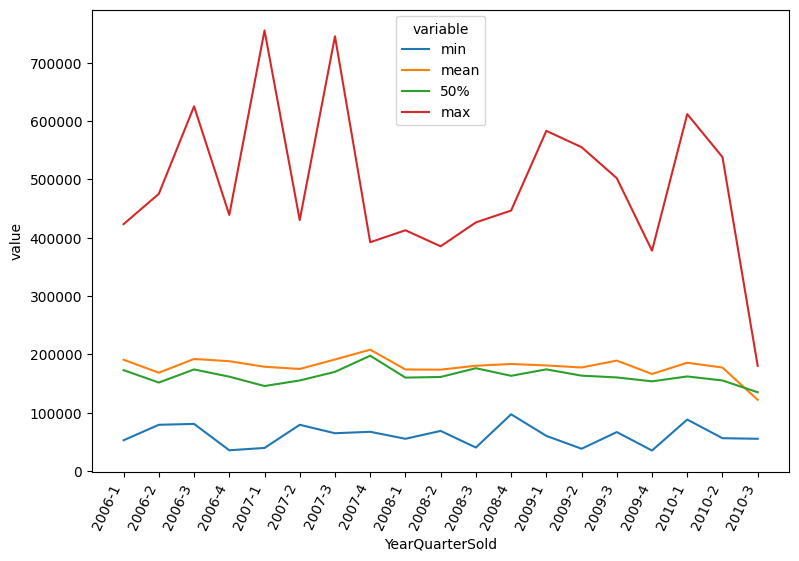

In [72]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(data=df_melt, x='YearQuarterSold', y='value', hue='variable')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# We can take a look at number of sold houses for the defined time periods as well
## 📊 We will use standard bar plot
- 🔎 In which quarter were the most houses sold?
- 💡 Fun facts: [https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home](https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home)

<BarContainer object of 4 artists>

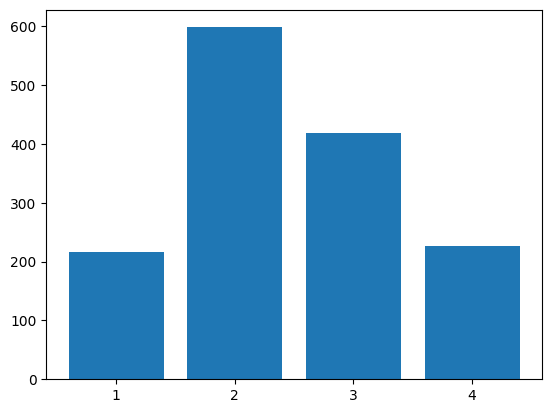

In [81]:
df["QuarterSold"] = df.apply(lambda row: f"{(row.MoSold + 2) // 3}", axis=1)
count = df.groupby("QuarterSold").Id.count()
plt.bar(count.index, count.values)

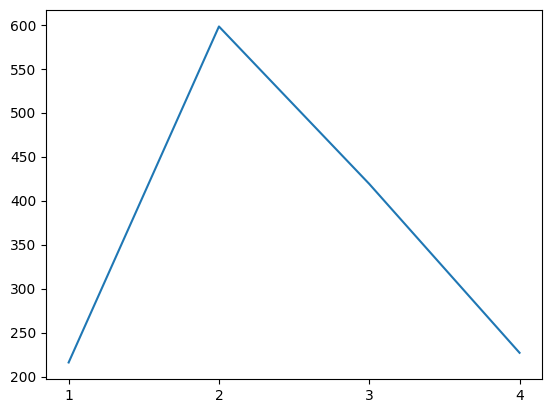

In [82]:
plt.plot(count)

# Tasks (2p)
## ✅ Task 1 - Outlier detection (1p)
- We need to somehow mark the outliers in the data according to the *SalePrice* and *GrLivArea*
    - One possibility is to compute [IQR](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) (Q3 - Q1) for both columns and mark outliers using lower and upper bounds
    - Lower bound: Q1 - 1.5*IQR
    - Upper bound: Q3 + 1.5*IQR
- 💡 If the house has *SalePrice* **OR** *GrLivArea* value outside of the bounds - it is an outlier
- Vizualize the data using scatter plot and distinguish the outlier and non-outlier data using different colors (*hue*) 💡

## ✅ Task 2 - Describe what you see in the data (1p)
- Try to vizualize the relationship between *SalePrice* and *OverallQual*
    - 💡You can use BoxPlots, Scatter plots, etc., the choice of a right plot type is up to you 🙂
- Do the same for *SalePrice* and *OverallCond*; i.e. vizualize and describe insight-
- **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
    - ❌ Plot interpretation figured in real-time during task check is not allowed! ❌

In [18]:
Q1_SalePrice = df.SalePrice.quantile(0.25)
Q3_SalePrice = df.SalePrice.quantile(0.75)
IQR_SalePrice = Q3_SalePrice - Q1_SalePrice
lower_SalePrice = Q1_SalePrice - 1.5 * IQR_SalePrice
upper_SalePrice = Q3_SalePrice + 1.5 * IQR_SalePrice

Q1_GrLivArea = df.GrLivArea.quantile(0.25)
Q3_GrLivArea = df.GrLivArea.quantile(0.75)
IQR_GrLivArea = Q3_GrLivArea - Q1_GrLivArea
lower_GrLivArea = Q1_GrLivArea - 1.5 * IQR_GrLivArea
upper_GrLivArea = Q3_GrLivArea + 1.5 * IQR_GrLivArea

df["Outlier"] = (df.SalePrice > upper_SalePrice) | (lower_SalePrice > df.SalePrice) | (df.GrLivArea > upper_GrLivArea) | (lower_GrLivArea > df.GrLivArea)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

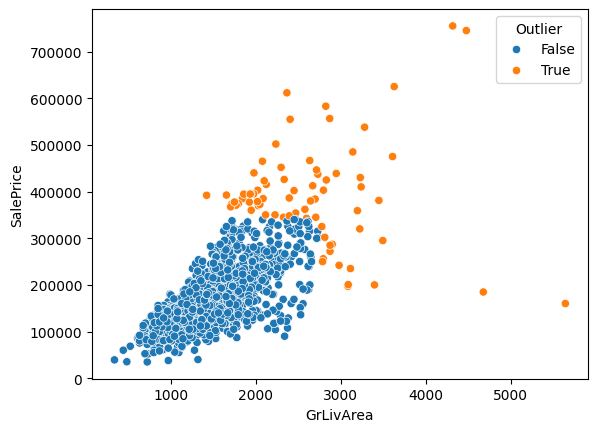

In [20]:
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='Outlier', data=df)

<Axes: xlabel='SalePrice', ylabel='OverallQual'>

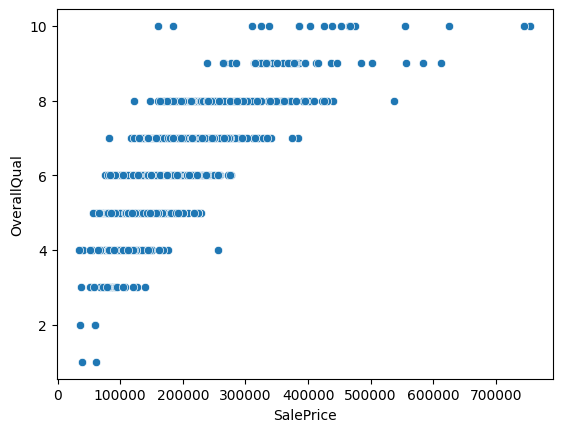

In [26]:
sns.scatterplot(data=df, x='SalePrice', y='OverallQual')

S rostoucí cenou můžeme vidět, že typicky roste i kvalita. Jsou tam ale i případy, kdy kvalita je nadstandarní vůči ceně. Je tam i pár extrémů, kde se domy prodaly za vysokou cenu, ale nestává se, že by se prodal dům s vysokou cenou a měl špatnou kvalitu.

<Axes: xlabel='SalePrice', ylabel='OverallCond'>

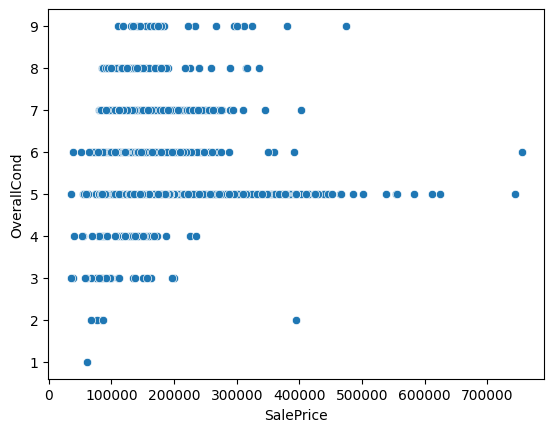

In [25]:
sns.scatterplot(data=df, x='SalePrice', y='OverallCond')

Tady můžeme vidět, že celková kvalita nemá ani tak vliv na cenu, protože se i v nízkých cenách prodávají domy s vysokou kvalitou. Je tady třeba jedna vyjímka, kdy se prodal dům za vyšší cenu (~400000) a měl nízkou kvalitu (2). Je celkem i dost případů, kde cena je vysoká (500000+) a vkalita je průměrná (5) a jeden případ, kdy cena je nad 700000 a kvalita 6. 